In [6]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (12,6)

# Вычислительная математика, ФИВТ, 2018

## Контакты

Чикиткин Александр Викторович, к.ф.-м.н.

Кафедра вычислительной физики МФТИ (603 КПМ)

**Лаборатория математического моделирования нелинейных процессов в газовых средах МФТИ (606 КПМ)**


## Общая информация о курсе

* Лекции и семинары
* Два письменные задания (**по 0.5 балла**)
* Две контрольные работы (1-я на семинарах, 2-я (итоговая) на лекции) (**по 2.5 балла**)
* 3 задачи на программирование + вопросы по теории (**по 1 баллу**)
* Посещение семинаров (**1 балл за все посещения**)
* Итоговая оценка округляется В МЕНЬШУЮ СТОРОНУ



* **При желании, некоторые задания могут быть заменены прикладными задачами из исследовательских проектов.** 

**В перерыве напишите свой email для рассылки заданий**

### Вопросы?

# О чём предмет?
Названия: вычислительная математика, численные методы, numerical analysis, scientific computing.

* *Numerical analysis is the study of algorithms for the problems of continuous mathematics.* (L. N. Trefethen)

* *Вычислительная математика изучает алгоритмы решения задач непрерывной математики.* 

**Алгоритмы** - конечная последовательность операций для получения приближенного решения (числа, вектора и т.п.)

**Непрерывная математика** - решаемые задачи содержать непрерывные переменные ($\mathbb{R}^n$, $\mathbb{C}^n$ ). 

*Алгоритмы решения задач дискретной математики: информатика, теория алгоритмов, комбинаторика (computer science)*

**Четкой границы между этими областями нет!**

## Формат семинаров

* Краткое повторение/изучение теории
* Решение практических задач на Python 
* Анализ, объяснение результатов

## Запуск Jupyter notebook

1. Включите комьютеры, загрузите CentOS, логин student
2. Places-> connect to Server
3. Server type: Windows  
Server: pxe.vdi.mipt.ru  
folder: tmp  
username: student
4. Скопируйте папку "00-lecture" в локальную папку student
5. Запустите на рабочем столе ярлык jupyter
6. Откройте "00-lecture/00-prac-intro.ipynb"




## Машинная арифметика в Python

In [2]:
import numpy as np
print('Python machine eps:', np.finfo(float).eps) # Машинное эпсилон Питона
print('2**-52 =', 2**-52)
# При этом 
print('1 + 2**-52 =', 1 + 2**-52)
print('1 + 2**-53 =', 1 + 2**-53)
# Порог машинного нуля ниже, чем в теории (см. "субнормальные числа")
print('2**-1075 =', 2**-1075)
print('2**-1076 =', 2**-1076)

Python machine eps: 2.220446049250313e-16
2**-52 = 2.220446049250313e-16
1 + 2**-52 = 1.0000000000000002
1 + 2**-53 = 1.0
2**-1075 = 5e-324
2**-1076 = 0.0


## Суммирование $n$ чисел. [Алгоритм Кэхэна](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9A%D1%8D%D1%85%D1%8D%D0%BD%D0%B0)

Для вычисления суммы $n$ чисел
```
sum = 0  
c = 0  
    for i = 1, N
        y = a[i] - c
        t = sum + y
        c = (t - sum) - y
        sum = t
    end for
```


In [1]:
# Вычисление суммы
import numpy as np

n = 10 ** 8
sm = 1e-10
x = np.ones(n, dtype=np.float32) * sm
x[0] = 1.0
sum_ex = 1.0 + (n - 1)*sm
sum_np = np.sum(x)

#
# Добавьте вычисление суммы по алгоритму Кэхэна и с помощью простой суммы и добавьте ошибку в вывод
# Не забудьте все числа привести к формату np.float32
# Попробуйте то же самое для двойной точности


print('Error in numpy sum = {0:5.2e} '.format(np.abs(sum_ex - sum_np)))

Error in numpy sum = 1.86e-04 


# Вычисление производной

На доске...

Постройте в логарифмической шкале график зависимости ошибки от шага $h$. Попробуйте двойную и одинарную точность


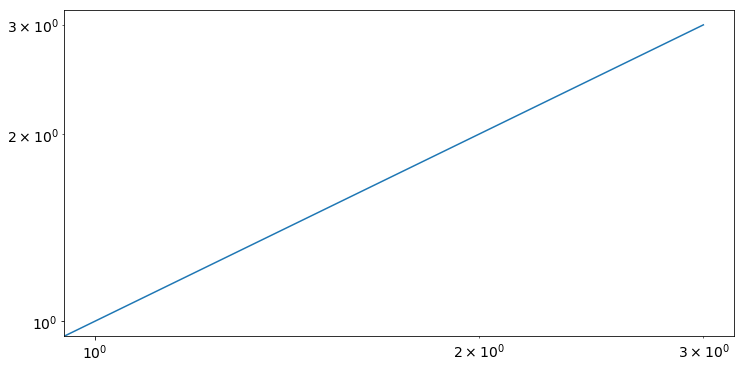

In [11]:
from matplotlib import pyplot as plt
import numpy as np

f = lambda x: np.sin(x)
df = lambda x: np.cos(x)

#
# Ваш код здесь
#

plt.loglog(np.arange(4), np.arange(4)) # Так строится график в логарифмической шкале

## Задача. Вычисление многочлена по правилу Горнера.

$$
p(x) = \sum_{i=0}^d a_i x^i
$$

Алгоритм Горнера для вычисления многочлена в точке $x$:  
```
p = a_d  
for i = d - 1 to 0  
    p = x \times p + a_i
end for
```

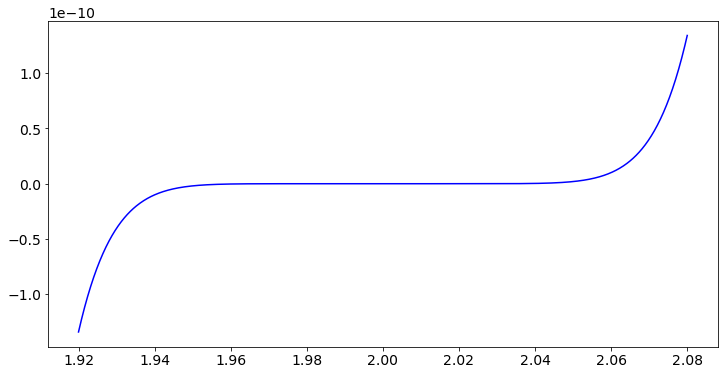

In [8]:
import numpy as np
from matplotlib import pyplot as plt

c = np.array([-512, 2304, -4608, 5376, -4032, 2016, -672, 144, -18, 1])
p = lambda x: (x-2)**9

xx = np.linspace(1.92, 2.08, 1000)
yy = p(xx)

plt.plot(xx, yy, 'b-')

#
# Добавьте вычисление значений многочлена по правилу Горнера, постройте график
# 
